# TrashNet Data Loading Demo

This notebook demonstrates how to load and visualize the TrashNet dataset.

In [1]:
import sys
sys.path.append('../src')

from trashsorting.data import TrashNet
import matplotlib.pyplot as plt
import torch

/workspaces/trash-image-sorting/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the Dataset

Load the training split of the TrashNet dataset:

In [2]:
# Load training dataset
dataset = TrashNet('../data/raw', split='train', fraction=0.1)

print(f"Dataset size: {len(dataset)} samples")
print(f"Classes: {dataset.classes}")
print(f"Number of classes: {len(dataset.classes)}")

Loading TrashNet dataset (split: train)...
Dataset loaded: 353 samples across 6 classes
Dataset size: 353 samples
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Number of classes: 6


## Visualize Sample Images

Plot a grid of sample images from each class:

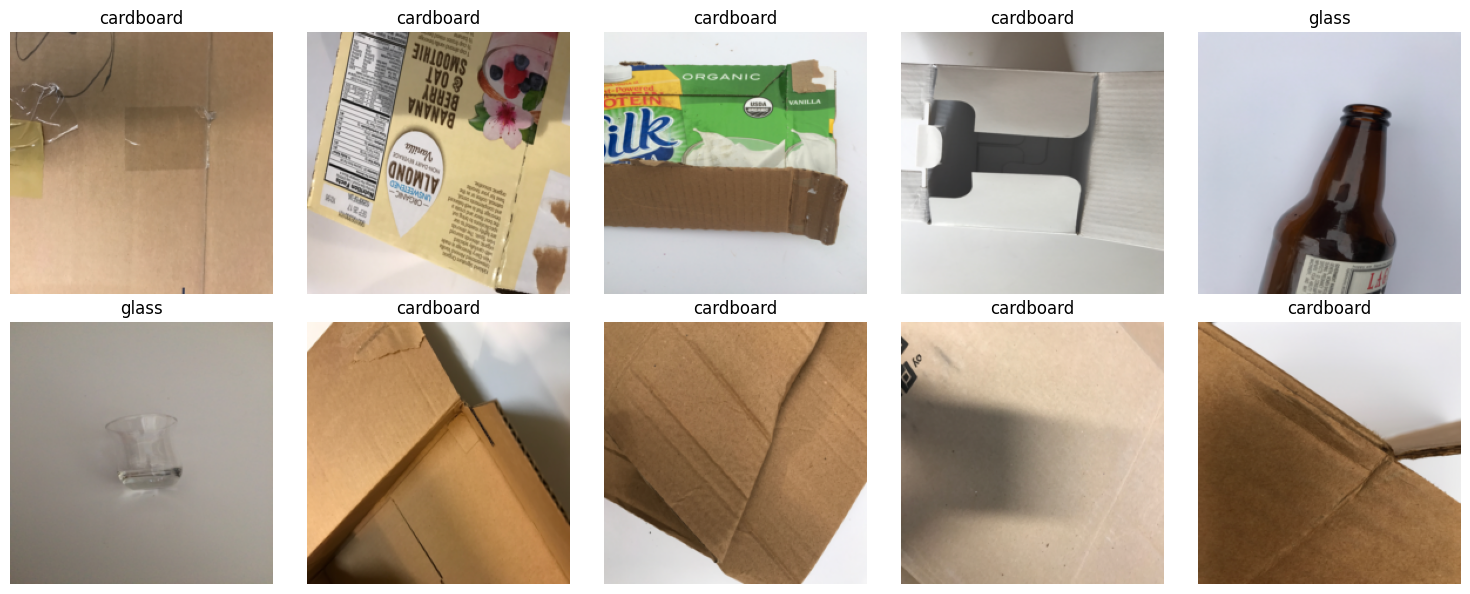

In [10]:
# Helper function to denormalize images for visualization
def denormalize(tensor):
    """Denormalize a tensor image with ImageNet mean and std."""
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return tensor * std + mean

# Plot 10 random samples
import random
random_indices = random.sample(range(len(dataset)), 10)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for idx, sample_idx in enumerate(random_indices):
    img, label = dataset[sample_idx]
    
    # Denormalize and convert to numpy
    img_denorm = denormalize(img)
    img_np = img_denorm.permute(1, 2, 0).numpy()
    img_np = img_np.clip(0, 1)  # Clip to valid range
    
    # Plot
    axes[idx].imshow(img_np)
    axes[idx].set_title(f"{dataset.classes[label]}")
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## Using with DataLoader

Example of using the dataset with PyTorch DataLoader for batched training:

In [ ]:
from torch.utils.data import DataLoader

# Create DataLoader
train_loader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=0)

# Get a batch
batch_images, batch_labels = next(iter(train_loader))

print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"Batch labels: {batch_labels}")
print(f"Class names: {[dataset.classes[label] for label in batch_labels]}")

In [ ]:
# Visualize the batch
fig, axes = plt.subplots(2, 4, figsize=(15, 7))
axes = axes.flatten()

for idx in range(8):
    img = denormalize(batch_images[idx])
    img_np = img.permute(1, 2, 0).numpy().clip(0, 1)
    
    axes[idx].imshow(img_np)
    axes[idx].set_title(f"{dataset.classes[batch_labels[idx]]}")
    axes[idx].axis('off')

plt.tight_layout()
plt.show()